In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data

In [4]:
fruits=pd.read_table('/content/drive/MyDrive/Machine Leaning/week 3/fruit_classifier.txt')

In [37]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [6]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Dataset memiliki tujuh kolom yang berisi informasi tentang buah-buahan. Di sini hanya dua buah yaitu apel dan mandarin yang terlihat. Setiap buah digambarkan dengan empat ciri yaitu 1) massa buah 2) lebar buah 3) berapa tinggi dan 4) berapa skor warna buah. Sekarang kita harus memeriksa berapa banyak buah yang ada dalam data kita.

In [7]:
fruits['fruit_name'].value_counts()


apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [8]:
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

In [10]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


Dengan melihat data di atas, terlihat bahwa untuk setiap buah terdapat label_buah. Untuk apel adalah 1, untuk mandarin adalah 2, untuk jeruk adalah 3 dan untuk lemon adalah 4. Sekarang kita akan memvisualisasikan data ini pada plot untuk eksplorasi lebih lanjut.


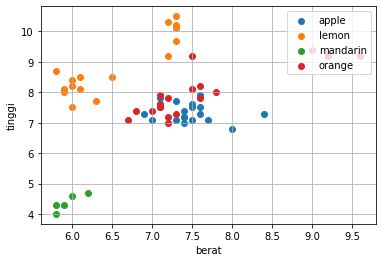

In [17]:
for uk,x in fruits.groupby('fruit_name'):
  plt.scatter(x['width'],x['height'], label=uk)

plt.legend(loc="upper right")
plt.xlabel("berat")
plt.ylabel("tinggi")
plt.grid(True)
plt.show()


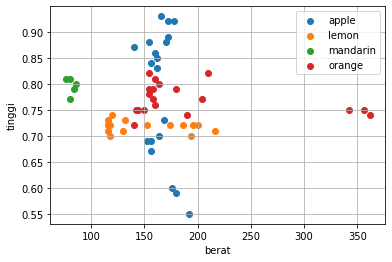

In [18]:
for uk,x in fruits.groupby('fruit_name'):
  plt.scatter(x['mass'],x['color_score'], label=uk)

plt.legend(loc="upper right")
plt.xlabel("berat")
plt.ylabel("tinggi")
plt.grid(True)
plt.show()

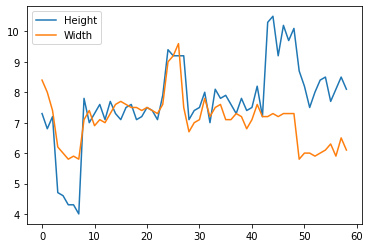

In [19]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [21]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [33]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
knn.score(X_test,y_test)


0.6

Sekarang kita dapat membuat prediksi dengan data baru sebagai berikut: Dalam 


In [35]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'mandarin'

In [36]:
#example2
prediction2=knn.predict([['300','7','10']])
predct[prediction2[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'orange'